In [ ]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('telecom_users.csv')

In [ ]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [ ]:
print(df.Churn.value_counts())
print('-'*30)
print(df.Churn.value_counts(normalize=True))

No     4399
Yes    1587
Name: Churn, dtype: int64
------------------------------
No     0.734881
Yes    0.265119
Name: Churn, dtype: float64


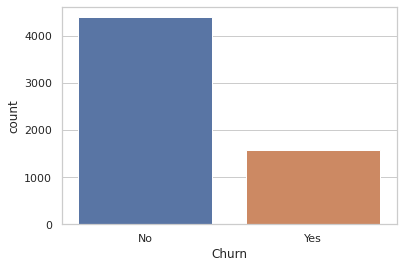

In [ ]:
sns.countplot("Churn", data=df)

## Первоночальные предположения

Сами данные не имеют пропущенных значений, что несколько упрощает нам работу.

Как видно из распределения целевой переменной 'Churn' отток клиентов меньше чем количество продленных контрактов(примерно в 2,7 раза). Для того чтобы понять, что заставляет клиента разорвать контракт проанализируем связь 'преданности' с другими данными(признаками).

Также заметно, что большинство данных, являющимися типом object, можно привести к categorical. Таким образом позволим в дальнейшем моделям работать с этими признаками.

In [ ]:
df.gender.value_counts()

Male      3050
Female    2936
Name: gender, dtype: int64

In [ ]:
df.groupby(['gender', 'Churn'])['Churn'].count()

gender  Churn
Female  No       2145
        Yes       791
Male    No       2254
        Yes       796
Name: Churn, dtype: int64

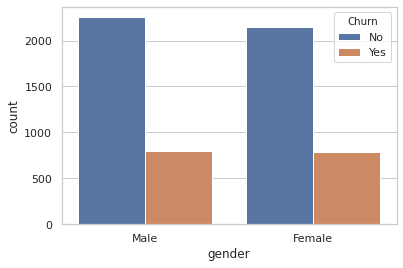

In [ ]:
sns.countplot('gender', hue='Churn', data=df)

Количество мужчин и женщин, пользующихся услугами данного оператора практически равно. То же самое можно сказать про преданность и отток.

In [ ]:
df.SeniorCitizen.value_counts()

0    5020
1     966
Name: SeniorCitizen, dtype: int64

In [ ]:
df.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()

SeniorCitizen  Churn
0              No       3835
               Yes      1185
1              No        564
               Yes       402
Name: Churn, dtype: int64

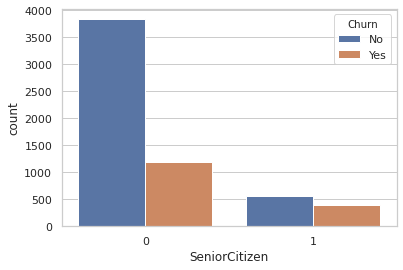

In [ ]:
sns.countplot('SeniorCitizen', hue='Churn', data=df)

Количество пожилых граждан горазде меньше чем молодых. При этом среди молодых гораздо больше клиентов, оставшихся верными оператору, что нельзя сказать о пожилых клиентов, где количество оставшихся клиентов больше только в 1,4 раза.
Это может быть связано с увелечением цен на услуги, что намног сильнее отражается на пожилых людях.

In [ ]:
df['Partner'] = df['Partner'].map( {"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.Partner.value_counts()

0    3082
1    2904
Name: Partner, dtype: int64

In [ ]:
df.groupby(['Partner', 'Churn'])['Churn'].count()

Partner  Churn
0        No       2071
         Yes      1011
1        No       2328
         Yes       576
Name: Churn, dtype: int64

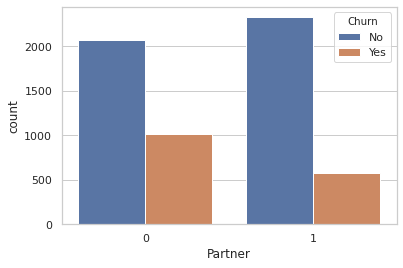

In [ ]:
sns.countplot('Partner', hue='Churn', data=df)

Для начала заменим данные столбца Partner на категориальные данные. 'Yes' заменим на 1, 'No' заменим на 0. В целом соотношение людей с партнером и без практически одинаковое. Однаков, клиенты, живущие с партнеров, немного лояльнее. Это может объяснятся тем, что люди живущие с партнером принимают совместные решения и меняют оператора тоже вместе.

In [ ]:
df['Dependents'] = df['Dependents'].map( {"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.Dependents.value_counts()

0    4195
1    1791
Name: Dependents, dtype: int64

In [ ]:
df.groupby(['Dependents', 'Churn'])['Churn'].count()

Dependents  Churn
0           No       2889
            Yes      1306
1           No       1510
            Yes       281
Name: Churn, dtype: int64

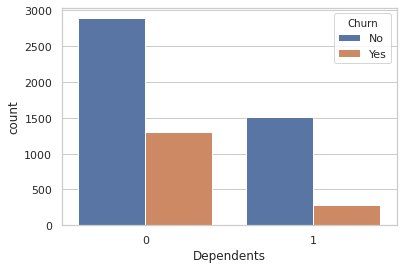

In [ ]:
sns.countplot('Dependents', hue='Churn', data=df)

Для столбца Dependents проделаем то же, что и для Partner(заменим oиject на categorical). Видно, что независимых людей больше чем зависимых чуть больше чем в два раза. При этом зависимые люди намного лояльнее, чем независимые. Трудно построить предположения на этих данных, т.к. не совсем понять, что означает столбец Dependents. Однако, зависимость достаточно очевидна.

In [ ]:
df.tenure.describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

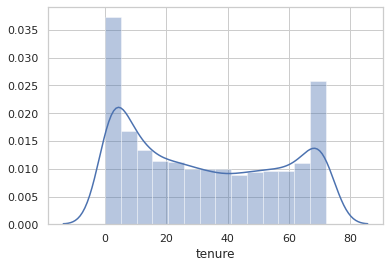

In [ ]:
sns.distplot(df['tenure'])

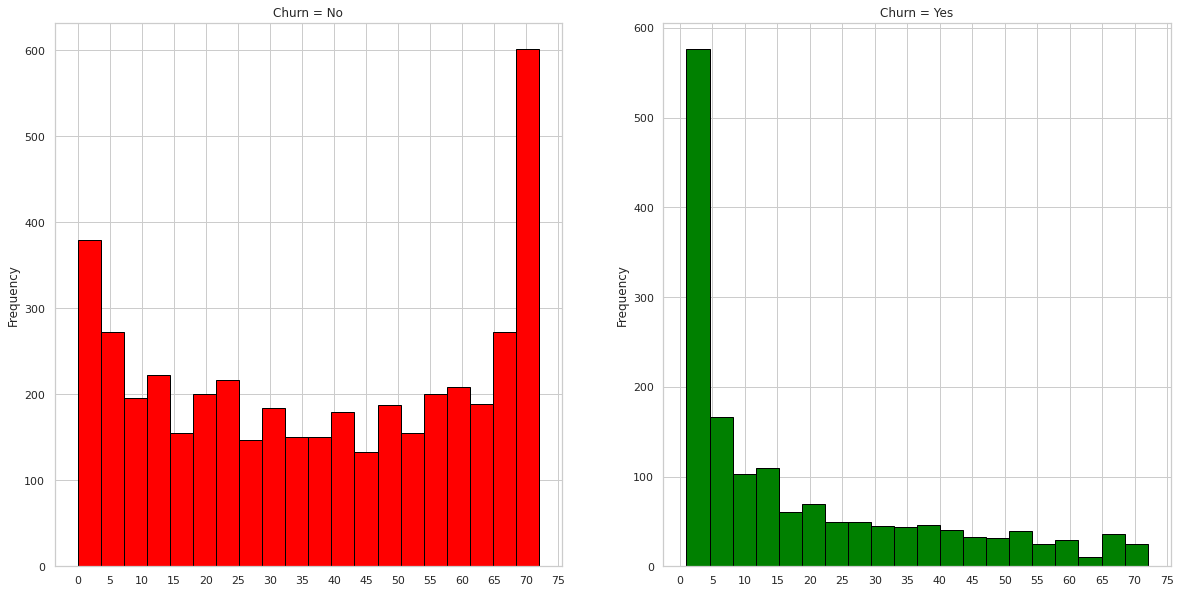

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Churn']=='No'].tenure.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Churn = No')
x1=list(range(0,80,5))
ax[0].set_xticks(x1)
df[df['Churn']=='Yes'].tenure.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Churn = Yes')
x2=list(range(0,80,5))
ax[1].set_xticks(x2)
plt.show()

Из распределения переменной tenure видно, что основные значения приходиться на диапазон от 0 до 5 и от 65 до 70. Т.к мы точно не знаем, что представляет собой переменная tenure, предположим, что это количество месяцев пользования услугами оператора. Из гистограммы распределения видно, что наибольший отток клиентов приходиться на первые месяци использования и постепенно убывает со временем. Клиенты от 5 до 65 месяцев примерно одинаково лояльны,и , начиная с 65го месяца преднности клиента значительно растет. Судя по данным графикам можно предположить, что больше всего внимания следует уделять новым клиентам.

In [ ]:
df['PhoneService'] = df['PhoneService'].map( {"Yes": 1, "No": 0} ).astype(int)
df.PhoneService.value_counts()

1    5396
0     590
Name: PhoneService, dtype: int64

In [ ]:
df['MultipleLines'] = df['MultipleLines'].map( {"No phone service":2 ,"Yes": 1, "No": 0} ).astype(int)
df.MultipleLines.value_counts()

0    2848
1    2548
2     590
Name: MultipleLines, dtype: int64

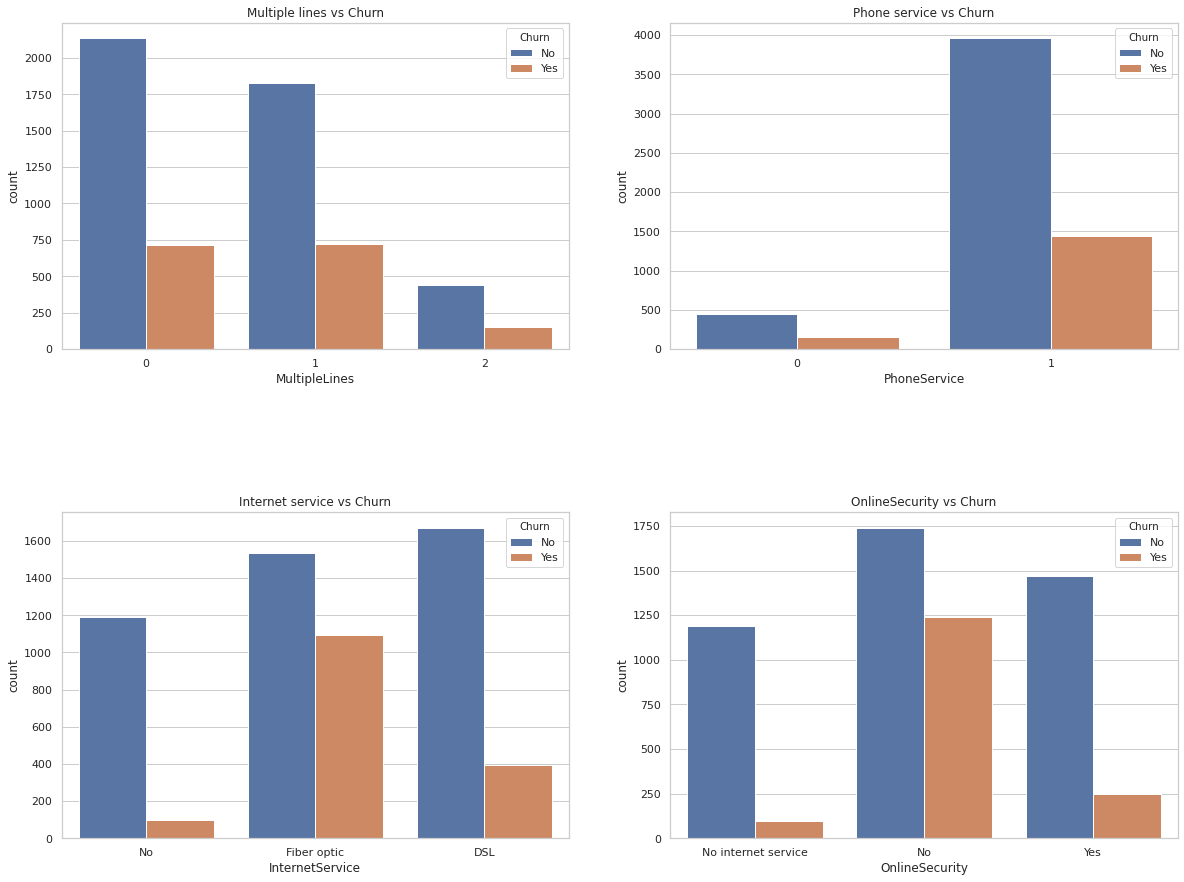

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('MultipleLines',hue='Churn', data=df,ax=ax[0,0])
ax[0,0].set_title('Multiple lines vs Churn')
sns.countplot('PhoneService',hue='Churn',data=df,ax=ax[0,1])
ax[0,1].set_title('Phone service vs Churn')
sns.countplot('InternetService',hue='Churn',data=df,ax=ax[1,0])
ax[1,0].set_title('Internet service vs Churn')
sns.countplot('OnlineSecurity',hue='Churn',data=df,ax=ax[1,1])
ax[1,1].set_title('OnlineSecurity vs Churn')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Проанализируем Churn в зависимости от различных сервисов. Для переменных MultipleLines и PhoneService распределение Churn примерно одинаковая и не зависит от того использует ли клиент данную функцию или нет.
Для InternetService и OnlineSecurity ситуация уже интереснее. Заметно, что клиенты использующие Fiber optic в качесвте интернет соединения значительно чаще разрывают контракты чем клиенты, использующие DSL. Клиентам, использующих Fibric можно предложить перейти на DSL.
Примерно то же можно сказать про Online Security. Люди, которые пользуются Online Security значительно меньше расторгают контракты чем люди непользующиеся данным сервисом. Соответсвенно можно предлагать подключить данную услугу клиенту.

In [ ]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

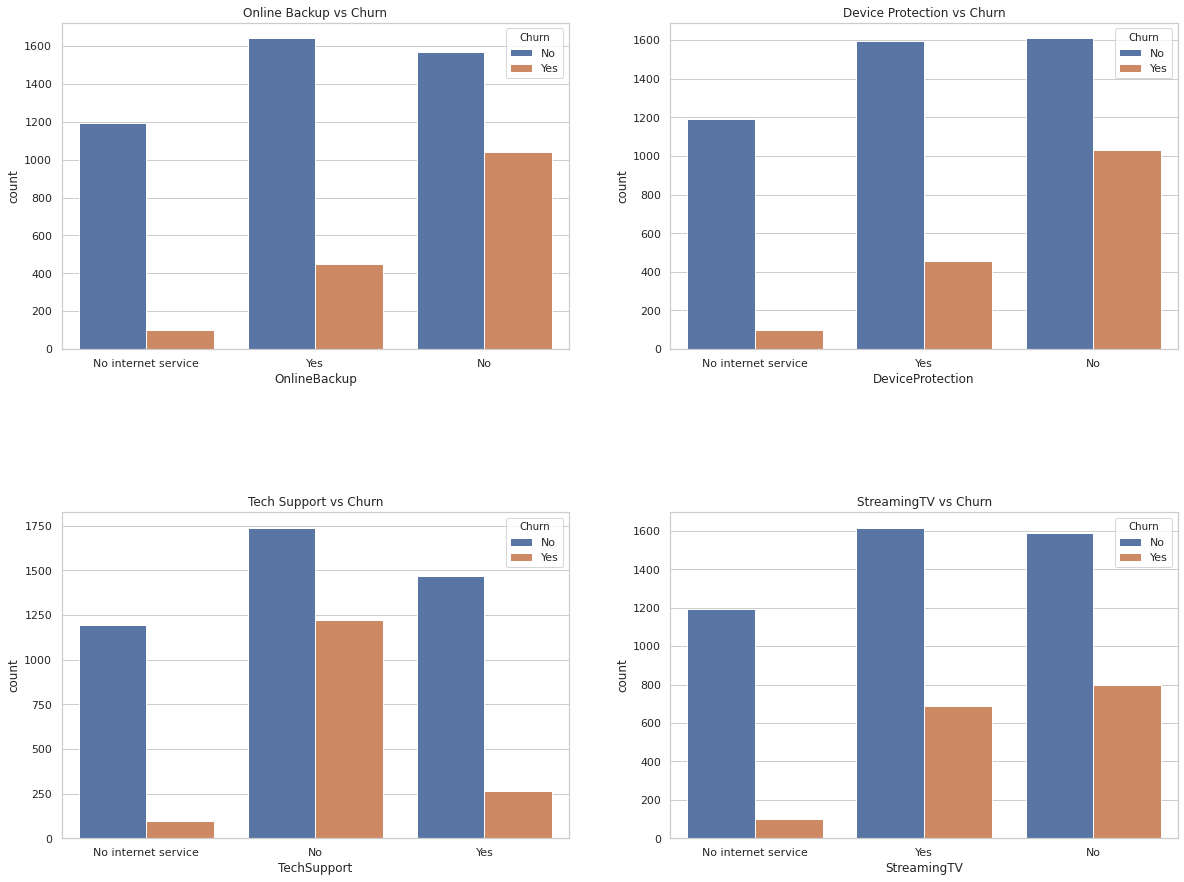

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('OnlineBackup',hue='Churn', data=df,ax=ax[0,0])
ax[0,0].set_title('Online Backup vs Churn')
sns.countplot('DeviceProtection',hue='Churn',data=df,ax=ax[0,1])
ax[0,1].set_title('Device Protection vs Churn')
sns.countplot('TechSupport',hue='Churn',data=df,ax=ax[1,0])
ax[1,0].set_title('Tech Support vs Churn')
sns.countplot('StreamingTV',hue='Churn',data=df,ax=ax[1,1])
ax[1,1].set_title('StreamingTV vs Churn')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Такая же зависимость видна для OnlineBackup, DeviceProtection и особенно TechSupport. Клиенты не использующие данные услуги значительно чаще уходят чем тем, кто использует. Особенно это критично для людей неиспользующих TechSupport.
Отток людей не использующих StreamingTV незначительно больше, чем использующих.

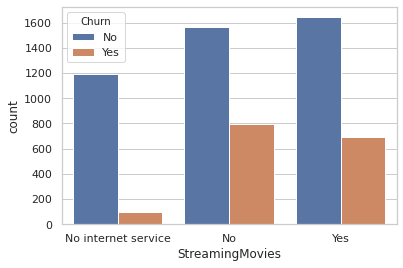

In [ ]:
sns.countplot('StreamingMovies', hue='Churn', data=df)

То же самое справедливо для клиентов использующих и неиспользующих StreamingMovies.

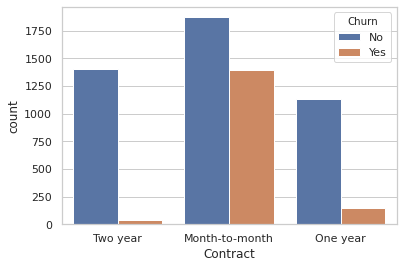

In [ ]:
sns.countplot('Contract', hue='Churn', data=df)

Отток клиентов использующих month-to-month контракт наиболее заметен. Клиенты использующие One year и Two year намного стабильнее. 

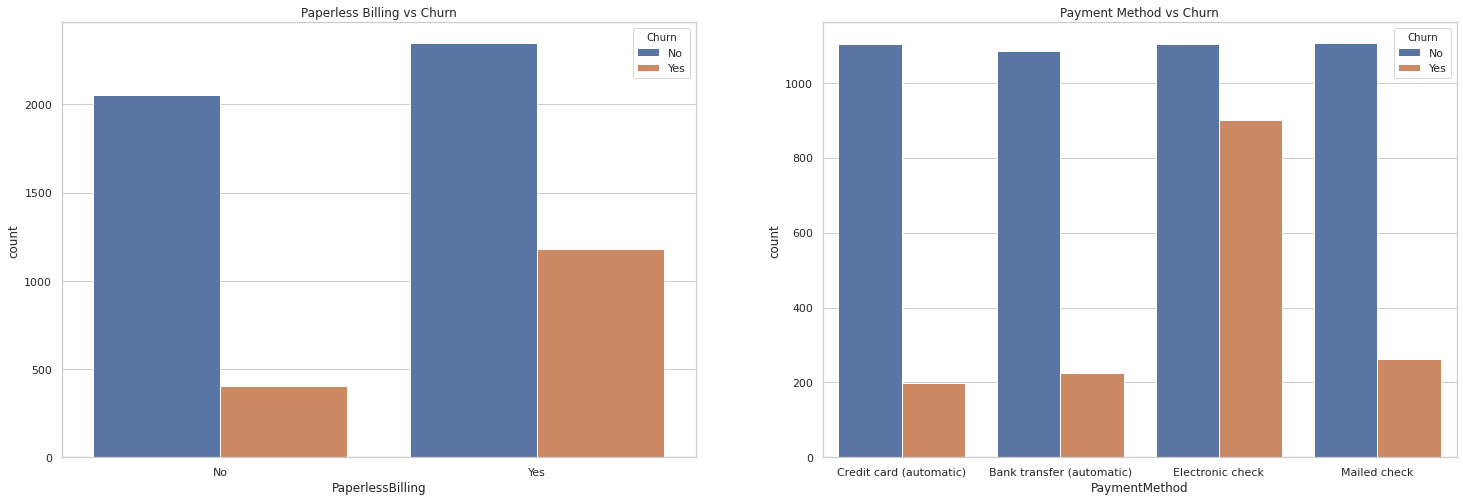

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,8))
sns.countplot('PaperlessBilling',hue='Churn', data=df,ax=ax[0])
ax[0].set_title('Paperless Billing vs Churn')
sns.countplot('PaymentMethod',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Payment Method vs Churn')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Клиенты, платящие кредитными карточками и банковскими переводами значительно лояльне чем люди платящте электронными чеками и почтовыми чеками. Особенно это видно для клиентов использующих электронные чеки.

In [ ]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = '0'
df.loc[3086,"TotalCharges"]

'0'

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float")
df.loc[3086,"TotalCharges"]

0.0

In [ ]:
df.loc[df['TotalCharges'] == 0, 'TotalCharges'] = np.median(df['TotalCharges'])
df.loc[3086,"TotalCharges"]

1408.575

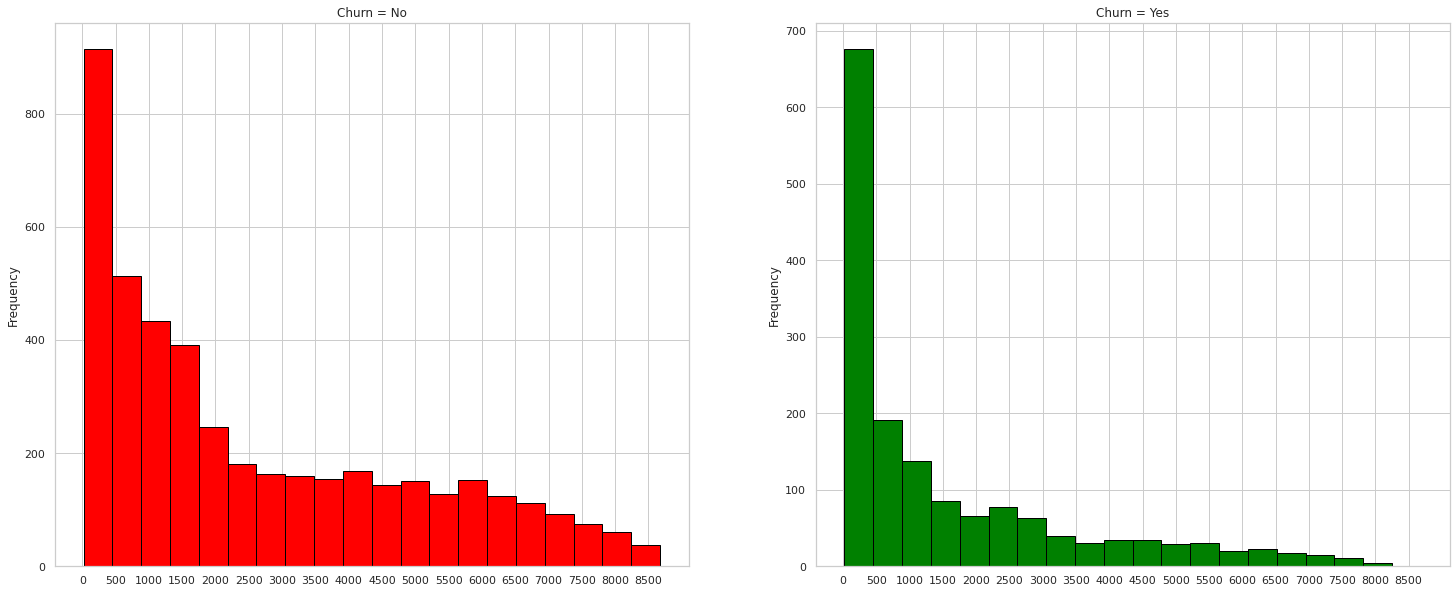

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,10))
df[df['Churn']=='No'].TotalCharges.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Churn = No')
x1=list(range(0,9000,500))
ax[0].set_xticks(x1)
df[df['Churn']=='Yes'].TotalCharges.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Churn = Yes')
x2=list(range(0,9000,500))
ax[1].set_xticks(x2)
plt.show()

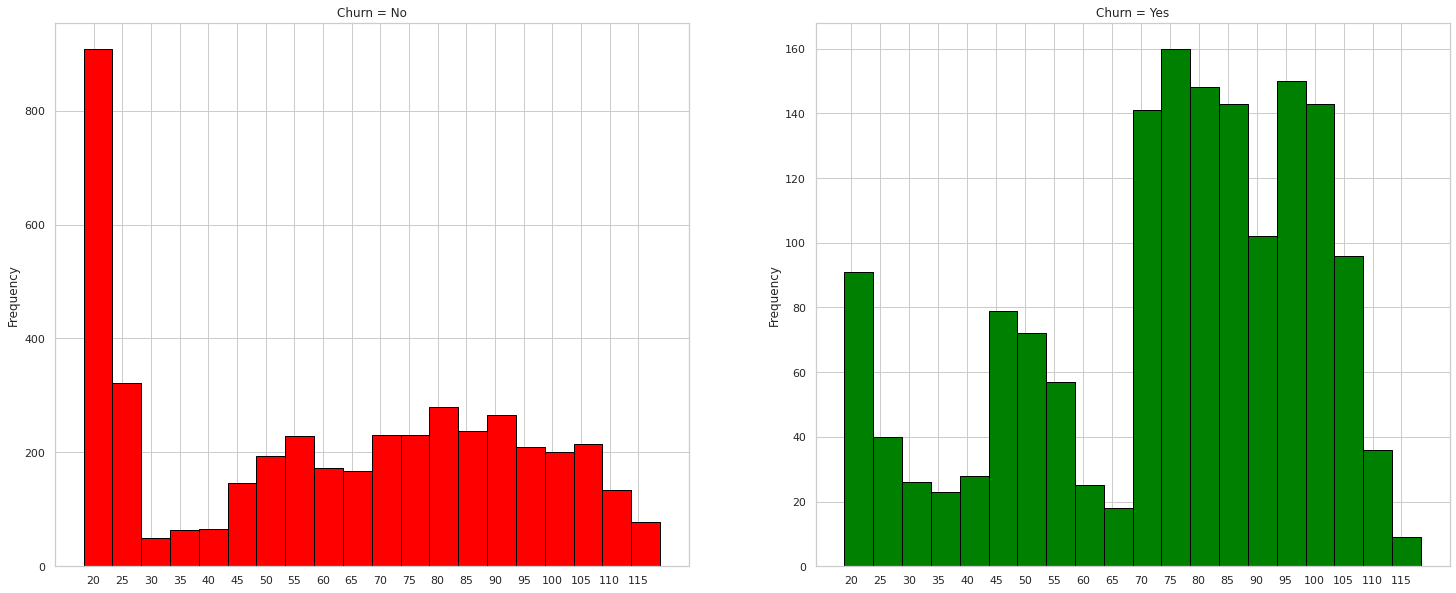

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,10))
df[df['Churn']=='No'].MonthlyCharges.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Churn = No')
x1=list(range(20,120,5))
ax[0].set_xticks(x1)
df[df['Churn']=='Yes'].MonthlyCharges.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Churn = Yes')
x2=list(range(20,120,5))
ax[1].set_xticks(x2)
plt.show()

По графику TotalCharges видно, что основной отток приходится на диапозон от 0 до 3000, после которого заметно убывает. Соответсвенно, чем больше у клиентов общий счет, тем дольше они являются клиентами оператора, тем они более лояльны.

По MonthlyCharges можно сказать, что наибольший отток приходится на диапозон счетов от 70 до 110. Соответсвенно, нужно сконцентрировать наибольшее внимание на этом сегменте.


Для построения моделей необходимо перевести до конца все признаки к категориальному виду.

In [ ]:
df.InternetService.value_counts()
df['InternetService'] = df['InternetService'].map( {"Fiber optic":2,"DSL": 1, "No": 0} ).astype(int)

In [ ]:
df.OnlineSecurity.value_counts()
df['OnlineSecurity'] = df['OnlineSecurity'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.OnlineBackup.value_counts()
df['OnlineBackup'] = df['OnlineBackup'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.DeviceProtection.value_counts()
df['DeviceProtection'] = df['DeviceProtection'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.TechSupport.value_counts()
df['TechSupport'] = df['TechSupport'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.StreamingTV.value_counts()
df['StreamingTV'] = df['StreamingTV'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.StreamingMovies.value_counts()
df['StreamingMovies'] = df['StreamingMovies'].map( {"No internet service":2,"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.Contract.value_counts()
df['Contract'] = df['Contract'].map( {"Two year":2,"One year": 1, "Month-to-month": 0} ).astype(int)

In [ ]:
df.PaperlessBilling.value_counts()
df['PaperlessBilling'] = df['PaperlessBilling'].map( {"Yes": 1, "No": 0} ).astype(int)

In [ ]:
df.PaymentMethod.value_counts()
df['PaymentMethod'] = df['PaymentMethod'].map( {"Electronic check": 3,
                                                "Mailed check": 2,
                                                "Bank transfer (automatic)": 1, 
                                                "Credit card (automatic)": 0} ).astype(int)

In [ ]:
df.gender.value_counts()
df['gender'] = df['gender'].map( {"Female": 1, "Male": 0} ).astype(int)

In [ ]:
df.Churn.value_counts()
df['Churn'] = df['Churn'].map( {"Yes": 1, "No": 0} ).astype(int)

In [ ]:
def tenure_lab(telcom) :
  if telcom["tenure"] <= 12 :
    return 0
  elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
    return 1
  elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
    return 2
  elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
    return 3
  elif telcom["tenure"] > 60 :
    return 4

df["tenure"] = df.apply(lambda df:tenure_lab(df), axis = 1)

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'customerID']
       
df = df.reindex(columns=cols)

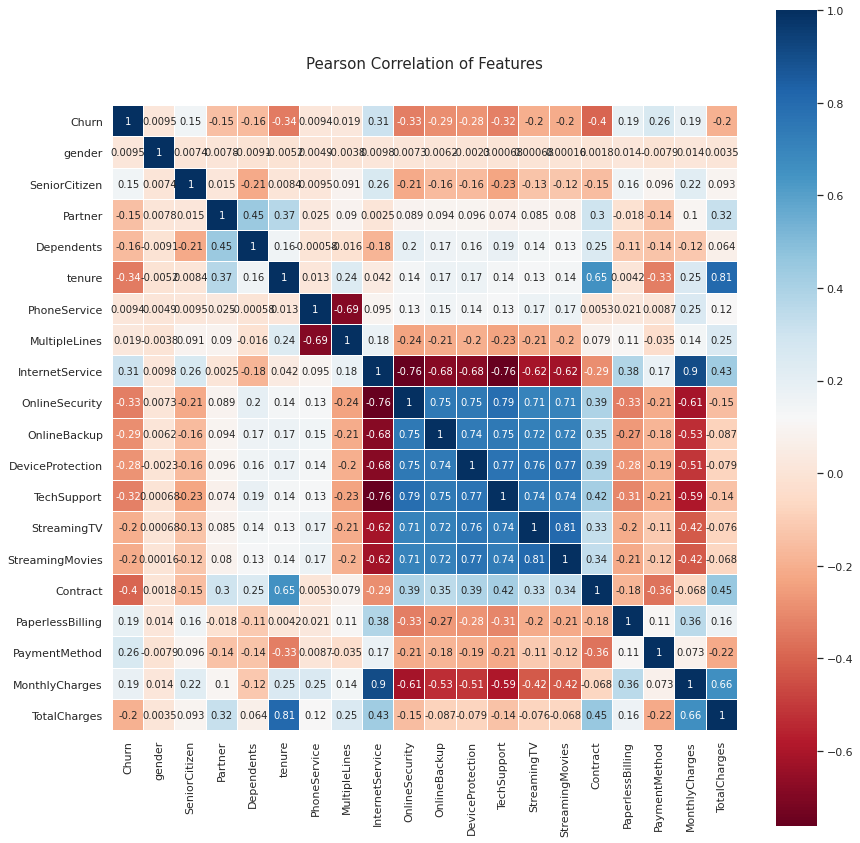

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df_2 = df.copy()
df_2.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID
0,0,0,0,1,1,4,1,1,0,2,2,2,2,2,2,2,0,0,24.10,1734.650024,7010-BRBUU
1,0,1,0,0,0,2,1,0,2,0,1,1,0,1,0,0,1,0,88.15,3973.199951,9688-YGXVR
2,1,1,1,1,0,2,1,1,2,0,0,0,0,0,0,0,1,1,74.95,2869.850098,9286-DOJGF
3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,3,55.90,238.500000,6994-KERXL
4,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,3,53.45,119.500000,2181-UAESM


In [ ]:
cols_to_drop = ['Dependents', 'tenure', 'MultipleLines', 'InternetService']
df_2 = df.drop(cols_to_drop, axis = 1)

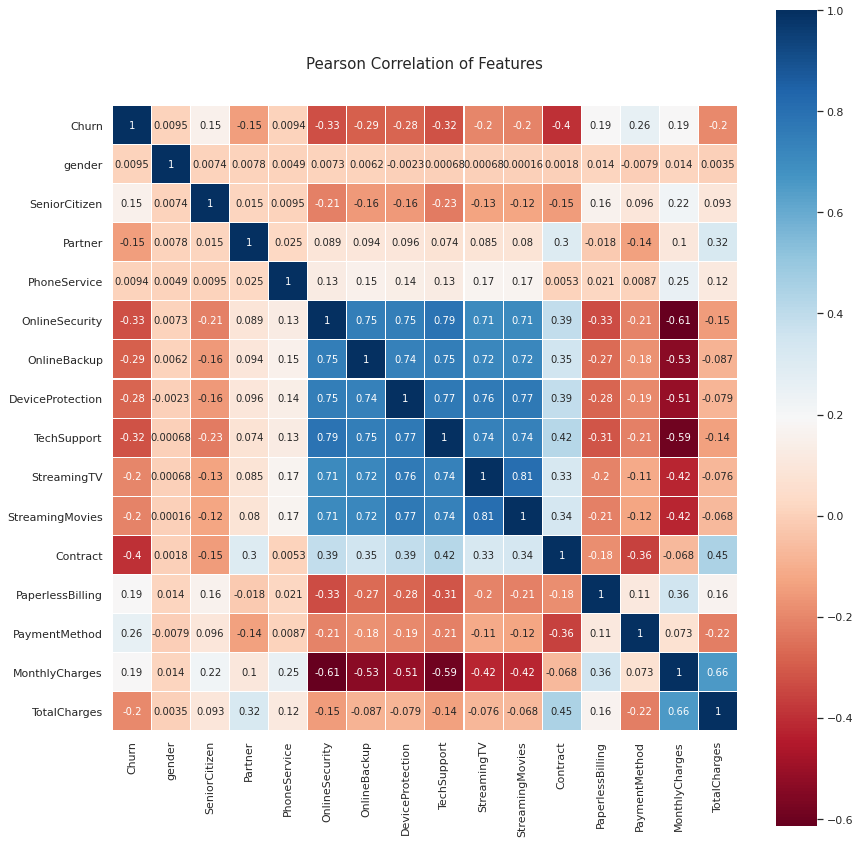

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools

In [ ]:
target = df_2['Churn']
ids = df_2['customerID']
df_2 = df_2.drop('customerID', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_2.iloc[:,1:], 
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 17)

# kf = KFold(n_splits=5, random_state=17)
# skf = StratifiedKFold(n_splits=5, random_state=17)

In [ ]:
# gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} 
# rfc_params = {'n_estimators': range(10, 100, 10), 'min_samples_leaf': range(1, 5)}
# lr_params = {'C': np.arange(0.5, 1, 0.1)}

gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
gb = GaussianNB()
knn = KNeighborsClassifier()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print("Decision tree recall score: ", recall_score(y_test, dt.fit(x_train, y_train).predict(x_test)))
print("Logistic regression recall score: ", recall_score(y_test, lr.fit(x_train, y_train).predict(x_test)))
print("Random forest recall score: ", recall_score(y_test, rfc.fit(x_train, y_train).predict(x_test)))
print("KNN recall score: ", recall_score(y_test, knn.fit(x_train, y_train).predict(x_test)))
print("Gradient Boosting recall score: ", recall_score(y_test, gbc.fit(x_train, y_train).predict(x_test)))

Decision tree recall score:  0.5142857142857142
Logistic regression recall score:  0.526984126984127
Random forest recall score:  0.4222222222222222
KNN recall score:  0.43174603174603177
Gradient Boosting recall score:  0.49523809523809526


In [ ]:
print("Naive Bayes recall score:", recall_score(y_test, gb.fit(x_train, y_train).predict(x_test)))
print("_"*30)
print()
print(classification_report(y_test, gb.fit(x_train, y_train).predict(x_test))) 

Naive Bayes recall score: 0.8031746031746032
______________________________

              precision    recall  f1-score   support

           0       0.90      0.65      0.76       883
           1       0.45      0.80      0.58       315

    accuracy                           0.69      1198
   macro avg       0.68      0.73      0.67      1198
weighted avg       0.78      0.69      0.71      1198



Confusion matrix, without normalization
[[578 305]
 [ 62 253]]


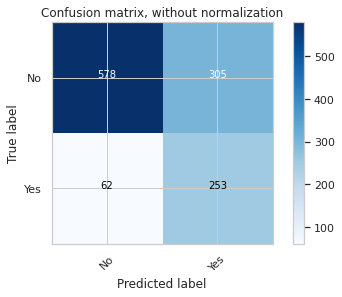

In [ ]:
# Compute confusion matrix
conf = confusion_matrix(y_test, gb.fit(x_train, y_train).predict(x_test))
np.set_printoptions(precision=2)

class_names = ['No', 'Yes']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization')

Общие выводы:
*   Так как нам важнее предсказывать, что клиент уйдет, максимизация recall score приорететнее в контексте данной задачи;
*   По этому показателю Naive Bayes classifier намного превосходит остальные модели;
*   Для еще более точного предсказания можно улучшить выбор признаков и провести дополнительный feature engineering, возможно получить новые признаки из уже имеющихся;
*  Комбинирование моделей(стакинг или ансамбль) врятли позволит улучшить результат, т.к. Naive Bayes намного лучше предсказывает чем остальные классификаторы;
*  Увелечение датасета(большее количество записей) должно повысить уровень предсказаний;
*  В целом проведен достаточно подробный анализ и результат в 80% recall неплох для учебного проекта. 

